In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
path=r"C:\Users\rocks\Documents\file handling\Visadataset.csv"

In [3]:
visa_df=pd.read_csv(path)
visa_df.head(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


## steps in outlier analysis

In [4]:
Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)

IQR=Q3-Q1


lb=Q1-1.5*IQR
ub=Q3+1.5*IQR

c1=visa_df['prevailing_wage']<lb
c2=visa_df['prevailing_wage']>ub
con=c1|c2

outliers_df=visa_df[con]
outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [5]:
Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)

IQR=Q3-Q1


lb=Q1-1.5*IQR
ub=Q3+1.5*IQR

c1=visa_df['prevailing_wage']>lb
c2=visa_df['prevailing_wage']<ub
con=c1|c2

outliers_df=visa_df[con]
outliers_df

non_outliers_df=visa_df[c1&c2]
non_outliers_df


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [7]:
Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)

IQR=Q3-Q1


lb=Q1-3*IQR
ub=Q3+3*IQR

c1=visa_df['prevailing_wage']>lb
c2=visa_df['prevailing_wage']<ub
con=c1&c2

outliers_df=visa_df[con]
outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


## compare original data with non outliers data

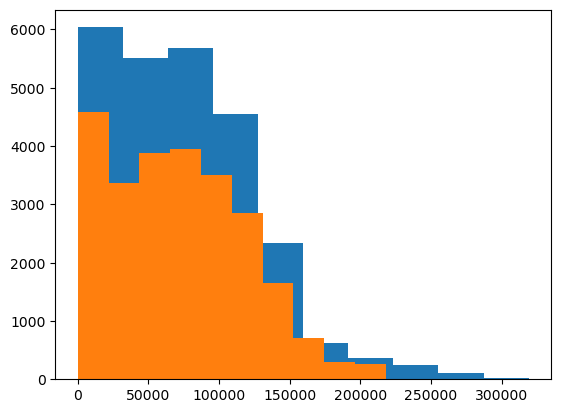

In [8]:
plt.hist(visa_df['prevailing_wage'])
plt.hist(non_outliers_df['prevailing_wage'])
plt.show()



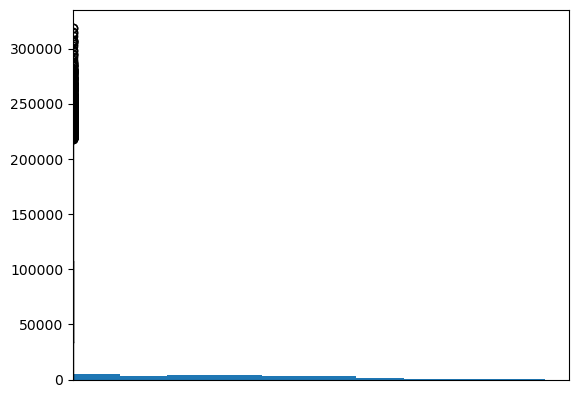

In [9]:
plt.boxplot(visa_df['prevailing_wage'])
plt.hist(non_outliers_df['prevailing_wage'])
plt.show()


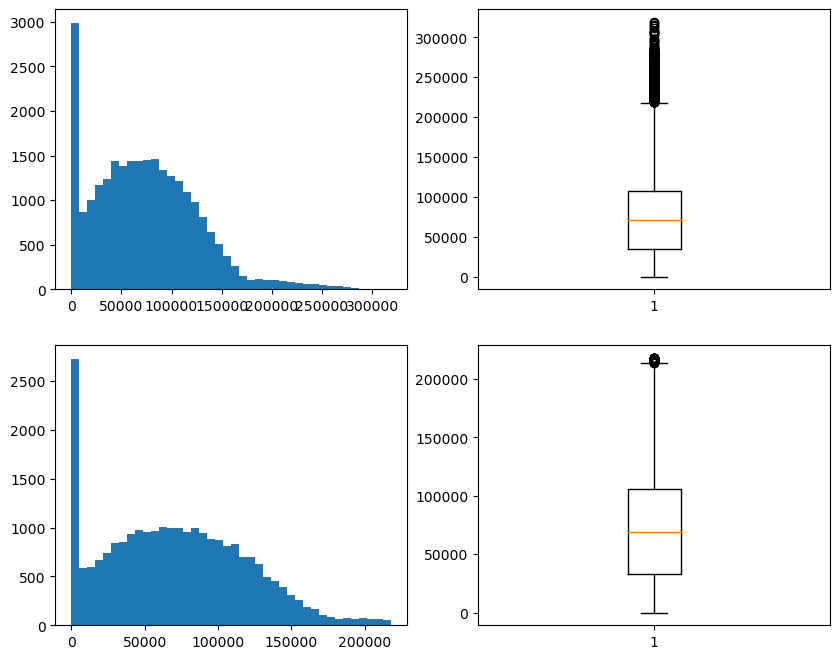

In [10]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.hist(visa_df['prevailing_wage'],bins=40)
plt.subplot(2,2,2)
plt.boxplot(visa_df['prevailing_wage'])
plt.subplot(2,2,3)
plt.hist(non_outliers_df['prevailing_wage'],bins=40)
plt.subplot(2,2,4)
plt.boxplot(non_outliers_df['prevailing_wage'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

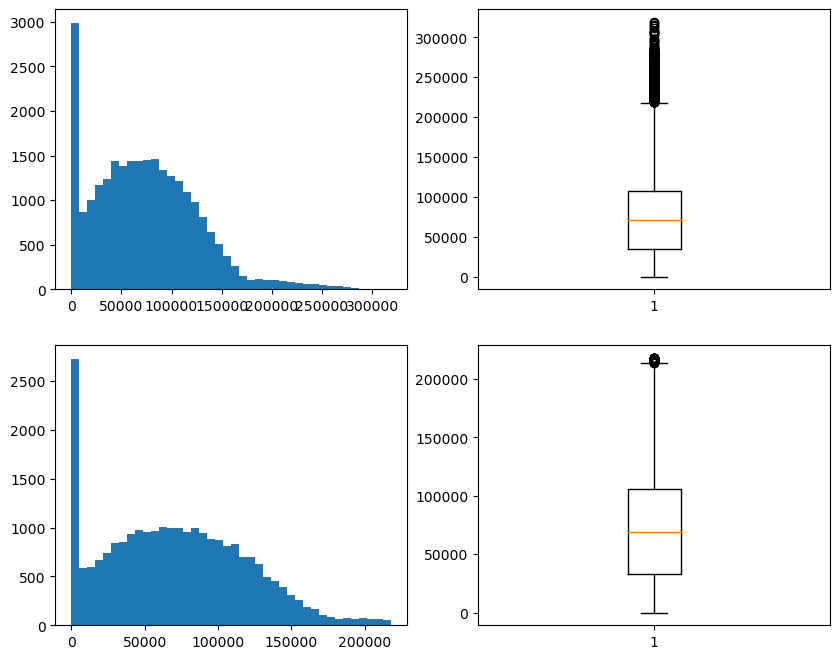

In [11]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1).hist(visa_df['prevailing_wage'],bins=40)
plt.subplot(2,2,2).boxplot(visa_df['prevailing_wage'])
plt.subplot(2,2,3).hist(non_outliers_df['prevailing_wage'],bins=40)
plt.subplot(2,2,4).boxplot(non_outliers_df['prevailing_wage'])
plt.show

## how to deal outliers

## $TASK$-$3$

In [12]:
list1=[]
meadian=visa_df['prevailing_wage'].median()
for i in visa_df['prevailing_wage']:
    if i<lb or i>ub:
        list1.append(median)
    else:
        list1.append(i)

len(list1)

25480

## $TASK$ - $2$

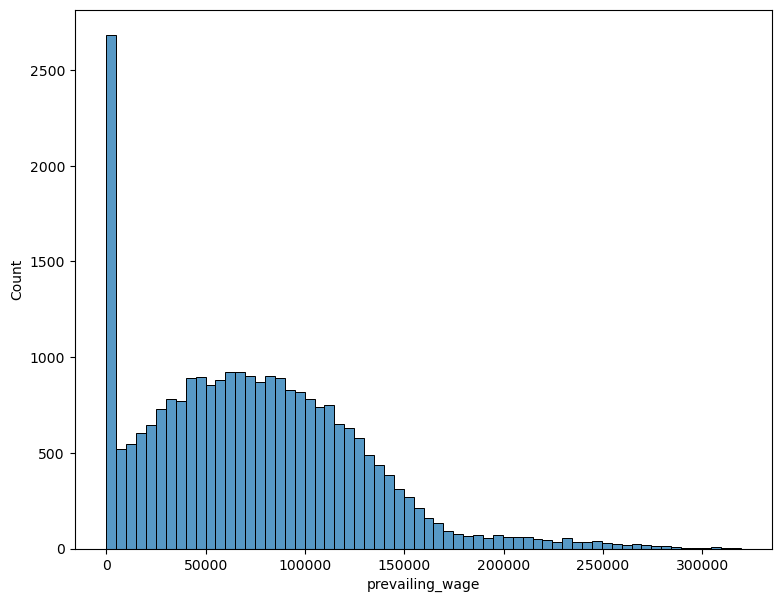

In [13]:
plt.figure(figsize=(9,7))
sns.histplot(visa_df['prevailing_wage'])
plt.show()

## $TASK$-$1$

In [14]:
lower=[2.136]
upper=[7.98]
frequency=[2992]

cols=['lower','upper','frequency']


df=pd.DataFrame(zip(lower,upper,frequency),columns=cols)
df

,lower,upper,frequency
0,2.136,7.98,2992


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [16]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [17]:
visa_df=pd.read_csv(path)
visa_df.head(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


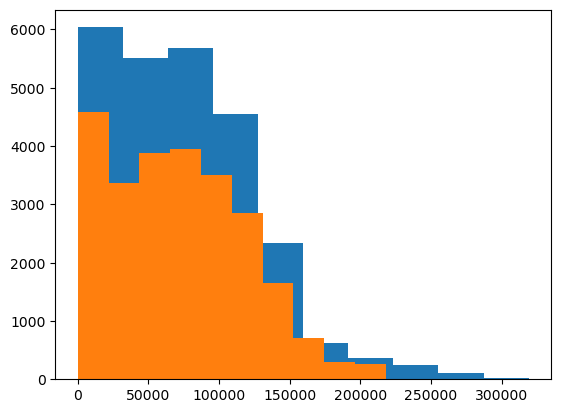

In [18]:
plt.hist(visa_df['prevailing_wage'])
plt.hist(non_outliers_df['prevailing_wage'])
plt.show()

In [19]:
Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)

In [20]:
c1=visa_df['prevailing_wage']>lb
c2=visa_df['prevailing_wage']<ub
con=c1&c2
non_outliers_df=visa_df[c1&c2]
non_outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


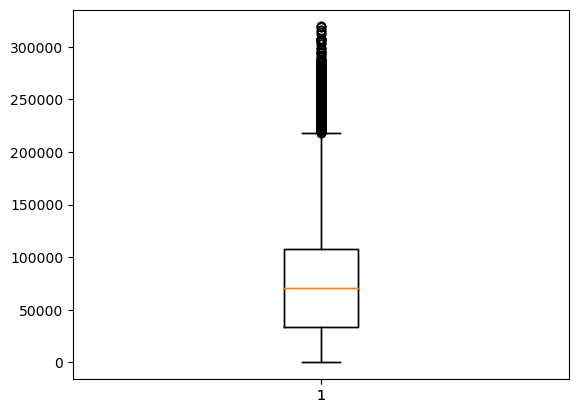

In [21]:
plt.boxplot(visa_df['prevailing_wage'])
plt.boxplot(non_outliers_df['prevailing_wage'])
plt.show()


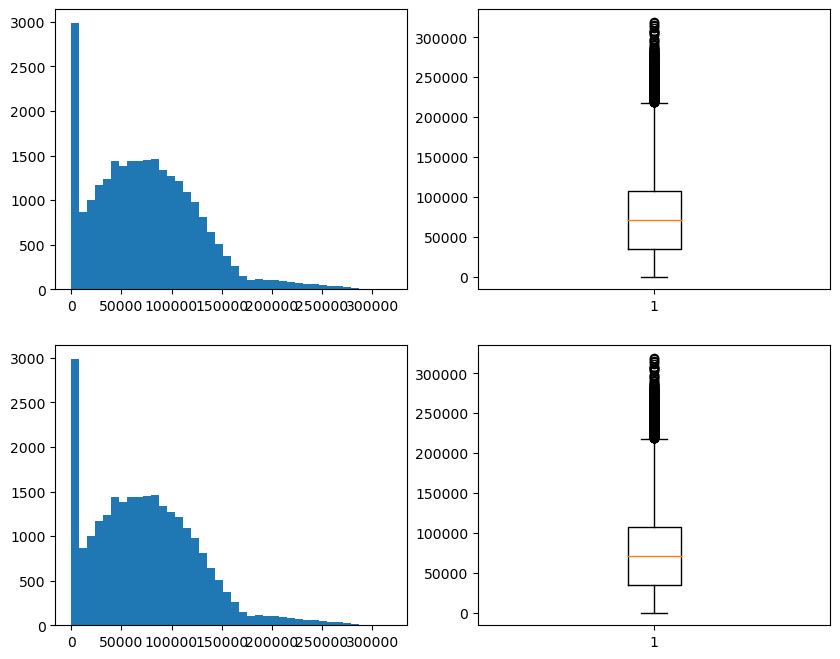

In [22]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.hist(visa_df['prevailing_wage'],bins=40)
plt.subplot(2,2,2)
plt.boxplot(visa_df['prevailing_wage'])
plt.subplot(2,2,3)
plt.hist(non_outliers_df['prevailing_wage'],bins=40)
plt.subplot(2,2,4)
plt.boxplot(non_outliers_df['prevailing_wage'])
plt.show()

In [23]:
list1=[]
meadian=visa_df['prevailing_wage'].median()
for i in visa_df['prevailing_wage']:
    if i<lb or i>ub:
        list1.append(median)
    else:
        list1.append(i)
len(list1)

25480

In [24]:
list1=[]
mean=visa_df['prevailing_wage'].mean()
for i in visa_df['prevailing_wage']:
    if i<lb or i>ub:
        list1.append(mean)
    else:
        list1.append(i)
len(list1)

25480

In [25]:
list1=[]
mode=visa_df['prevailing_wage'].mode()
for i in visa_df['prevailing_wage']:
    if i<lb or i>ub:
        list1.append(mode)
    else:
        list1.append(i)
len(list1)

25480

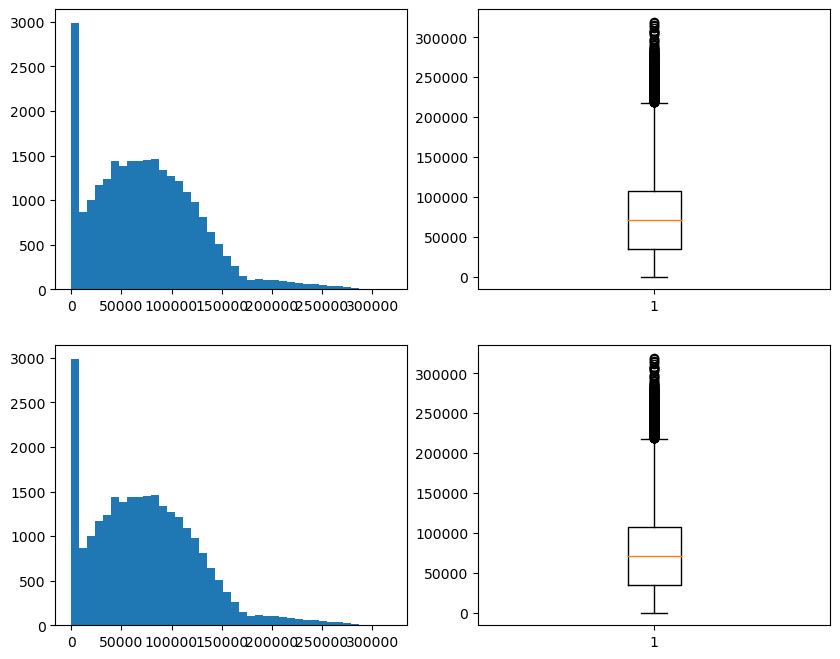

In [26]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1).hist(visa_df['prevailing_wage'],bins=40)
plt.subplot(2,2,2).boxplot(visa_df['prevailing_wage'])
plt.subplot(2,2,3).hist(non_outliers_df['prevailing_wage'],bins=40)
plt.subplot(2,2,4).boxplot(non_outliers_df['prevailing_wage'])
plt.savefig('prevailing_wages.jpeg')
plt.show()

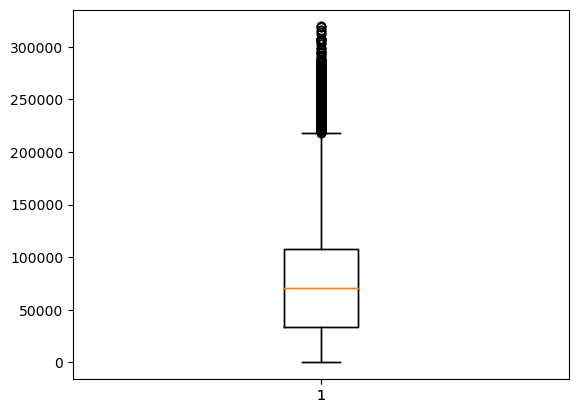

In [27]:
plt.boxplot(visa_df['prevailing_wage'])
plt.boxplot(non_outliers_df['prevailing_wage'])
plt.savefig('prevailing_wage_non_outliers')
plt.show()

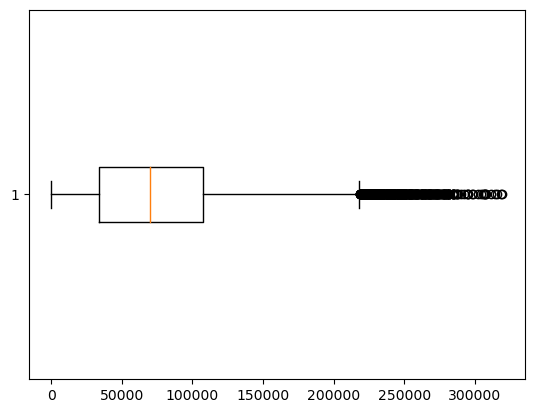

In [28]:
plt.boxplot(visa_df['prevailing_wage'],
            vert=False)
plt.savefig('prevailing_wages_vertical')
plt.show()

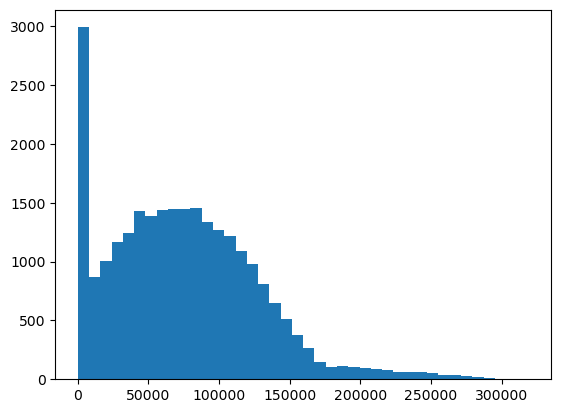

In [29]:
f,i,n=plt.hist(visa_df['prevailing_wage'],bins=40)

In [30]:
len(f),len(i),len(n)

(40, 41, 40)

In [31]:
f

array([2992.,  871., 1005., 1170., 1242., 1434., 1385., 1443., 1444.,
       1445., 1457., 1335., 1268., 1217., 1088.,  978.,  807.,  645.,
        509.,  373.,  264.,  144.,  105.,  111.,  107.,   99.,   88.,
         79.,   65.,   64.,   58.,   53.,   33.,   33.,   29.,   19.,
          7.,    3.,    6.,    5.])

In [32]:
i

array([2.13670000e+00, 7.98234003e+03, 1.59625434e+04, 2.39427467e+04,
       3.19229500e+04, 3.99031534e+04, 4.78833567e+04, 5.58635600e+04,
       6.38437634e+04, 7.18239667e+04, 7.98041700e+04, 8.77843734e+04,
       9.57645767e+04, 1.03744780e+05, 1.11724983e+05, 1.19705187e+05,
       1.27685390e+05, 1.35665593e+05, 1.43645797e+05, 1.51626000e+05,
       1.59606203e+05, 1.67586407e+05, 1.75566610e+05, 1.83546813e+05,
       1.91527017e+05, 1.99507220e+05, 2.07487423e+05, 2.15467627e+05,
       2.23447830e+05, 2.31428033e+05, 2.39408237e+05, 2.47388440e+05,
       2.55368643e+05, 2.63348847e+05, 2.71329050e+05, 2.79309253e+05,
       2.87289457e+05, 2.95269660e+05, 3.03249863e+05, 3.11230067e+05,
       3.19210270e+05])

In [33]:
between 2.13670000e+00 to  7.98234003e+03
we have 2992 observations

between 7.98234003e+03 to 1.59625434e+04
we have 871 observations

SyntaxError: invalid syntax (4225187032.py, line 1)

In [34]:
l=2.13670000e+00
u=7.98234003e+03
c1=visa_df['prevailing_wage']>=l
c2=visa_df['prevailing_wage']<u
c=c1&c2
len(visa_df[c])

2992

In [35]:
def frquency(l,u):
    c1=visa_df['prevailing_wage']>=l
    c2=visa_df['prevailing_wage']<u
    c=c1&c2
    print(len(visa_df[c]))
frquency(7.98234003e+03,1.59625434e+04)


871


In [36]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [37]:
path=r"C:\Users\rocks\Documents\file handling\Visadataset.csv"


In [38]:
visa_df=pd.read_csv(path)
visa_df.head(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [39]:

list2=[]
for i in visa_df['prevailing_wage']:
    if i<lb or i>ub:
        list2.append(median)
    else:
        list2.append(i)

visa_df['prevailing_wage_new']=list2

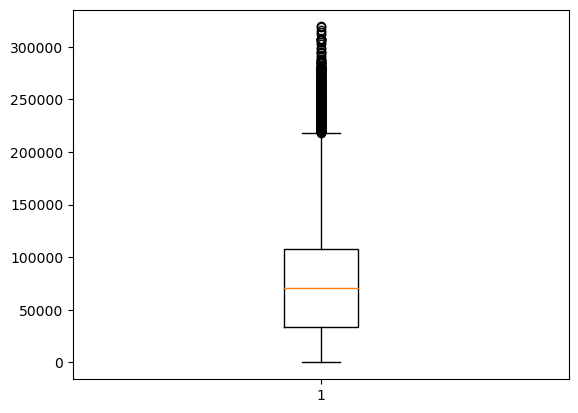

In [40]:
plt.boxplot(visa_df['prevailing_wage_new'])
plt.show()

In [41]:
path=r"C:\Users\rocks\Documents\file handling\Visadataset.csv"

In [42]:
visa_df=pd.read_csv(path)
visa_df.head(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [11]:
d={'Num':np.array([1,2,3,4,5])}
l=np.where(d['Num']>2,100,d['Num'])
d['Num']=1
t=1
print(d['Num'])
print(t)

1
1


In [12]:
l=np.where(d['Num']>2,100, d['Num'])

d['Num']=1
t=100
print(d['Num'])
print(t)

1
100


In [46]:
con= visa_df['prevailing_wage']

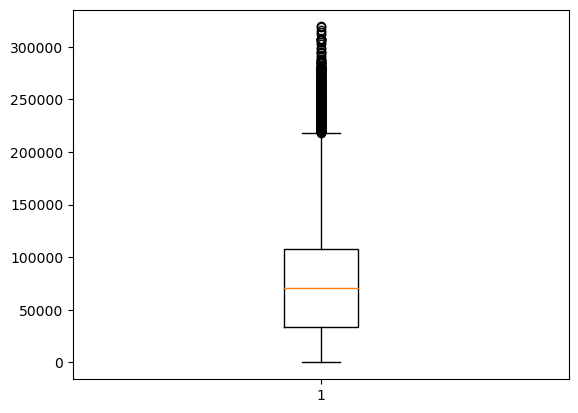

In [51]:
median=visa_df['prevailing_wage'].median()
c1=visa_df['prevailing_wage']<lb
c2=visa_df['prevailing_wage']>ub
con=c1|c2
t=median
f=visa_df['prevailing_wage']
visa_df['prevailing_wage']=np.where(con,t,f)
plt.boxplot(visa_df['prevailing_wage'])
plt.show()

In [48]:
median=visa_df['prevailing_wage']

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
path=r"C:\Users\rocks\Documents\file handling\Visadataset.csv"

In [15]:
visa_df=pd.read_csv(path)
visa_df.head(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [21]:
Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)

In [17]:
IQR=Q3-Q1

In [18]:
lb=Q1-1.5*IQR
ub=Q3+1.5*IQR

In [22]:
#####------------- Step-1------###########
Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)
#####------------- Step-2------###########
IQR=Q3-Q1
#####------------- Step-3------###########
lb=Q1-1.5*IQR
ub=Q3+1.5*IQR
median=visa_df['prevailing_wage'].median()
list1=[]
for i in visa_df['prevailing_wage']:
    if i<lb or i>ub:
        list1.append(median)
    else:
        list1.append(i)
visa_df['prevailing_wage_new']=list1

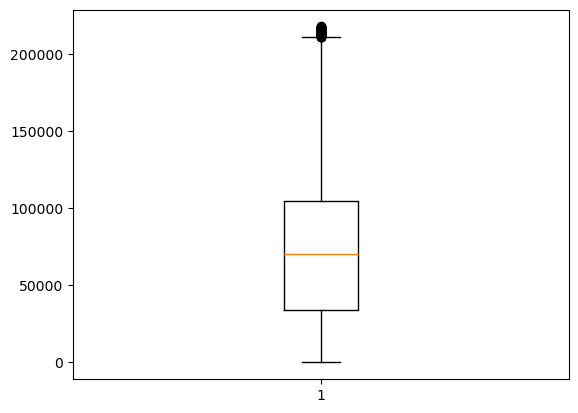

In [23]:
plt.boxplot(visa_df['prevailing_wage_new'])
plt.show()

In [24]:
dict1={'Name':['A','B','C','D'],
'Num':[1,2,3,4]}
d=pd.DataFrame(dict1)
d
d['Num']>2

0    False
1    False
2     True
3     True
Name: Num, dtype: bool

In [25]:
l=[]
for i in d['Num']:
    if i>2:
        l.append(100)
    else:
        l.append(i)
d['Num']=l
d

,Name,Num
0,A,1
1,B,2
2,C,100
3,D,100


In [26]:
l=np.where(d['Num']>2,100,d['Num'])
d['Num']=l
d

,Name,Num
0,A,1
1,B,2
2,C,100
3,D,100


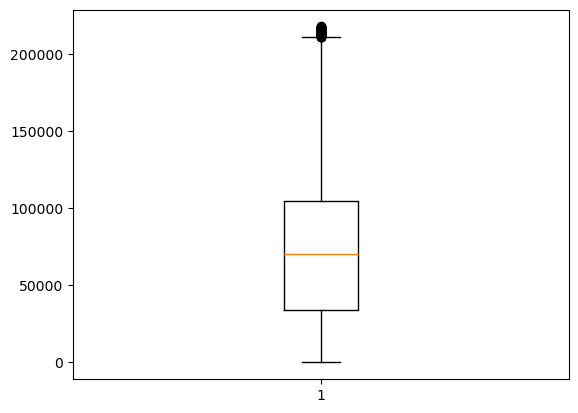

In [27]:
#####------------- Step-1------###########
Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)
#####------------- Step-2------###########
IQR=Q3-Q1
#####------------- Step-3------###########
lb=Q1-1.5*IQR
ub=Q3+1.5*IQR
median=visa_df['prevailing_wage'].median()
c1=visa_df['prevailing_wage']<lb
c2=visa_df['prevailing_wage']>ub
con=c1|c2
t=median
f=visa_df['prevailing_wage']
visa_df['prevailing_wage']=np.where(con,t,f)
plt.boxplot(visa_df['prevailing_wage'])
plt.show()

In [28]:
dict1={'Name':['A','B','C','D'],'Num':[1,2,3,4]}
d1=pd.DataFrame(dict1)
d1
l=[]
for i in d1['Num']:
    if i >2:
        l.append(100)
    else:
        l.append(i)
d1['Num']=l
d1

,Name,Num
0,A,1
1,B,2
2,C,100
3,D,100
